<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-and-preprocessing-of-data:" data-toc-modified-id="Load-and-preprocessing-of-data:-1">Load and preprocessing of data:</a></span></li><li><span><a href="#General-statistics:" data-toc-modified-id="General-statistics:-2">General statistics:</a></span></li></ul></div>

## Load and preprocessing of data:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

In [45]:
df = pd.read_csv('tweets.csv')

In [46]:
df.head()

,author,content,country,date_time,id,language,latitude,longitude,number_of_likes,number_of_shares
0,katyperry,Is history repeating itself...?#DONTNORMALIZEH...,NaN,12/01/2017 19:52,8.196330e+17,en,NaN,NaN,7900,3472
1,katyperry,@barackobama Thank you for your incredible gra...,NaN,11/01/2017 08:38,8.191010e+17,en,NaN,NaN,3689,1380
2,katyperry,Life goals. https://t.co/XIn1qKMKQl,NaN,11/01/2017 02:52,8.190140e+17,en,NaN,NaN,10341,2387
3,katyperry,Me right now 🙏🏻 https://t.co/gW55C1wrwd,NaN,11/01/2017 02:44,8.190120e+17,en,NaN,NaN,10774,2458
4,katyperry,SISTERS ARE DOIN' IT FOR THEMSELVES! 🙌🏻💪🏻❤️ ht...,NaN,10/01/2017 05:22,8.186890e+17,en,NaN,NaN,17620,4655


In [47]:
len(df)

52542

In [48]:
print(min(df.date_time))
print(max(df.date_time))

01/01/2011 02:16
31/12/2016 23:59


In [49]:
Twitter_accounts = np.unique(df.author)
print(Twitter_accounts)

['ArianaGrande' 'BarackObama' 'Cristiano' 'KimKardashian' 'TheEllenShow'
 'Twitter' 'YouTube' 'britneyspears' 'cnnbrk' 'ddlovato' 'instagram'
 'jimmyfallon' 'jtimberlake' 'justinbieber' 'katyperry' 'ladygaga'
 'rihanna' 'selenagomez' 'shakira' 'taylorswift13']


## General statistics:

In [50]:
Tweet_span={}
for account in Twitter_accounts:
    span =[datetime.datetime.strptime(date[0:10],"%d/%m/%Y") for date in df[df.author == account].date_time]
    Tweet_span[account] = (max(span)-min(span)).days

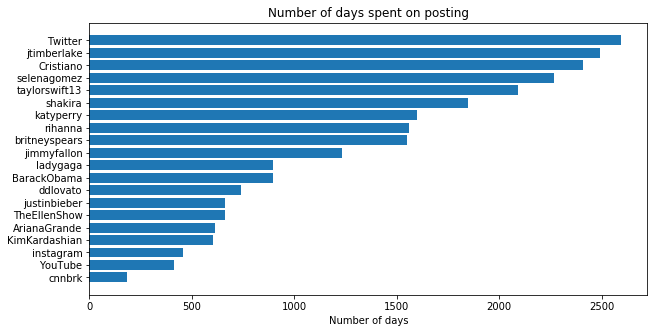

In [60]:
# Time spend to post the tweets:
plt.figure(figsize = [10,5])
sorted_Tweet_span = dict(sorted(Tweet_span.items(), key=lambda kv: kv[1]))
plt.barh(list(sorted_Tweet_span.keys()),sorted_Tweet_span.values());
plt.xlabel('Number of days');
plt.title('Number of days spent on posting');
plt.savefig('../Number_tweet_days.png')

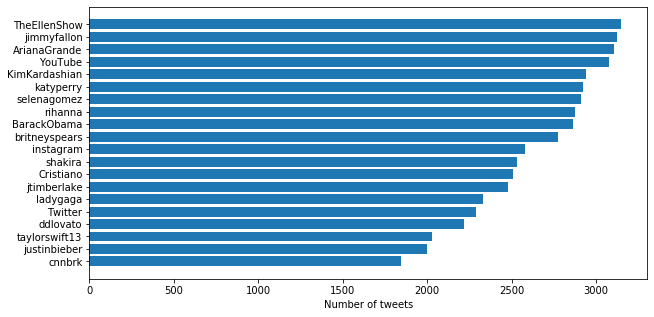

In [58]:
# Number of tweets made by each - is the same for all
plt.figure(figsize = [10,5])
n_tweets = dict(zip(Twitter_accounts,[len(df[df.author == Twitter_accounts[i]]) for i in range(len(Twitter_accounts))]))
sorted_n_tweets = dict(sorted(n_tweets.items(), key=lambda kv: kv[1]))
plt.barh(list(sorted_n_tweets.keys()),sorted_n_tweets.values());
plt.xlabel('Number of tweets');
plt.savefig('../Number_of_tweets.png')

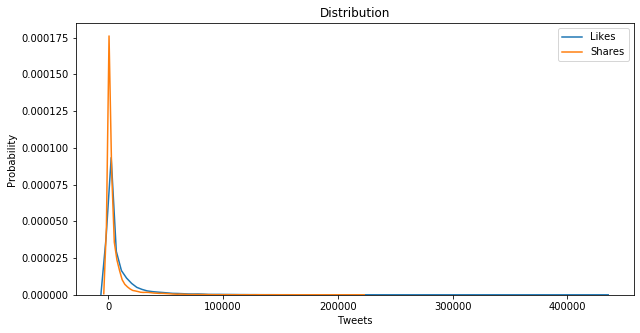

In [59]:
# Distribution plot:
plt.figure(figsize = [10,5])
sns.kdeplot(df.number_of_likes, label="Likes")
sns.kdeplot(df.number_of_shares, label="Shares")
plt.xlabel('Tweets')
plt.ylabel('Probability')
plt.title('Distribution');
plt.savefig('../Like_share_Distribution.png')